In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [4]:
print(torch.__version__)

2.0.1


In [5]:
import os
from pathlib import Path
path=Path('data/train')

In [16]:
image_folder_path = "data/train"
transform = transforms.Compose([
    transforms.Resize((28, 28)),  # Resize images to a desired size
    transforms.ToTensor(),         # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the image data
])
train_dataset = datasets.ImageFolder(root=image_folder_path, transform=transform)
train_data_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
len(train_data_loader)

1313

In [ ]:
test_folder_path = "data/test"
test_dataset = datasets.ImageFolder(root=test_folder_path, transform=transform)
test_dataset = datasets.DatasetFolder(root=test_folder_path, loader=lambda x: Image.open(x), extensions=('.jpg', '.jpeg', '.png'), transform=transform)


In [ ]:
test_data_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)
len(test_data_loader)

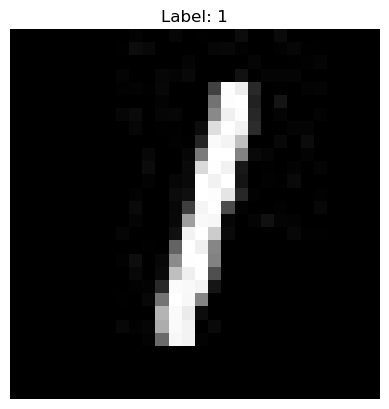

In [20]:
fig = plt.figure()

for images, labels in train_data_loader:
    image = images[0]  # Extract the image from the batch (assuming batch size is 1)
    label = labels[0]  # Extract the label from the batch (assuming batch size is 1)

    # Convert the tensor image to a numpy array and transpose the dimensions
    image = image.numpy().transpose((1, 2, 0))

    # Reverse the normalization applied earlier
    image = 0.5 * image + 0.5

    # Plot the image
    plt.imshow(image)
    plt.title("Label: {}".format(label))
    plt.axis("off")
    plt.show()
    break

In [24]:
class_names=train_dataset.classes
train_dataset.class_to_idx

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


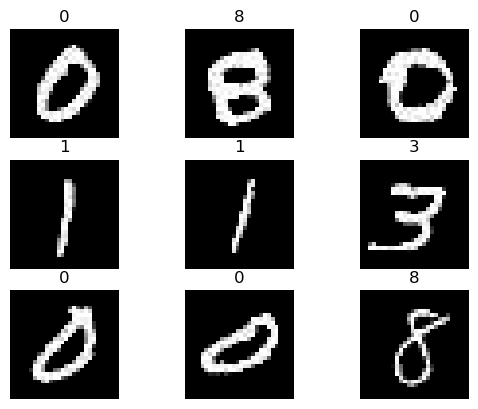

In [29]:
# torch.manual_seed(42)
def plt_gray(train_data=train_dataset,rows=3,cols=3):
    for i in range(1,(rows*cols)+1):
        ridx=torch.randint(0,high=len(train_data),size=[1]).item()
        plt.subplot(rows,cols,i)
        image,label=train_data[ridx]
        plt.imshow(image.permute(1,2,0),cmap='gray')
        plt.title(class_names[label])
        plt.axis(False)
plt_gray()

In [26]:
image,label=train_dataset[0]
p

torch.Size([3, 28, 28])

In [31]:
torch.min(image)

tensor(-1.)